# 엑셀자료
### 부산공공데이터포털

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family']='MaruBuri'

In [2]:
df1=pd.read_excel('부산광역시_환경오염 배출시설.xlsx')
df2=pd.read_excel('부산광역시_대기질 정보 조회.xlsx')

In [3]:
df1.head()

,구군명,업체명,도로명주소,업종,전화번호,위도,경도,데이터기준일자
0,해운대구,효성프리미어모터스㈜부산서비스센터,부산광역시 해운대구 수영강변대로 588(반여동),"정비, 세차",051-240-1010,35.209664,129.122140,2021-09-14
1,해운대구,케이씨씨(KCC)유압,부산광역시 해운대구 반송로525번길 33(석대동),유압기기제조,051-759-7766,35.219567,129.119989,2021-09-14
2,해운대구,이미자,부산광역시 해운대구 송정중앙로9번길 8(송정동),세차,-,35.183827,129.202310,2021-09-14
3,해운대구,㈜엘시티피에프브이,부산광역시 해운대구 달맞이길 30(중동),부동산매매업,051-781-0001,35.161333,129.168014,2021-09-14
4,해운대구,세진공업사,부산광역시 해운대구 선수촌로 164-10(반여동),그외 금속파스너 및 나사제품제조업,051-528-8327,35.207297,129.122969,2021-09-14


In [4]:
df2.head()

,측정시간,지역이름,측정소코드,대표항목,대표항목 값,대표항목 지수,아황산가스,아황산가스 지수,이산화질소,이산화질소 지수,오존,오존 지수,일산화탄소,일산화탄소 지수,초미세먼지,초미세먼지 지수,미세먼지,미세먼지 지수
0,2022072812,태종대,221141,PM10,22,1,0.191,X,0.007,X,0.026,X,18.9,X,6,1,16,1
1,2022072812,청학동,221142,PM25,40,1,0.003,1,0.018,1,0.018,1,0.2,1,13,1,21,1
2,2022072812,전포동,221152,PM10,32,1,0.004,1,0.012,1,0.017,1,0.3,1,10,1,22,1
3,2022072812,온천동,221162,NO2,42,1,0.003,1,0.025,1,0.014,1,0.3,1,7,1,8,1
4,2022072812,명장동,221163,PM25,40,1,0.000,X,0.013,1,0.019,1,0.0,X,14,1,14,1


# 데이터처리과정

In [5]:
# 업종에 - 가 포함된 행 삭제, 필요없는 열 삭제

In [6]:
df11=df1[df1['업종'].str.contains('-')].index
df1.drop(df11,inplace=True)

In [7]:
df1_1=df1[['구군명','도로명주소','업종']]
df1_1.head()

,구군명,도로명주소,업종
0,해운대구,부산광역시 해운대구 수영강변대로 588(반여동),"정비, 세차"
1,해운대구,부산광역시 해운대구 반송로525번길 33(석대동),유압기기제조
2,해운대구,부산광역시 해운대구 송정중앙로9번길 8(송정동),세차
3,해운대구,부산광역시 해운대구 달맞이길 30(중동),부동산매매업
4,해운대구,부산광역시 해운대구 선수촌로 164-10(반여동),그외 금속파스너 및 나사제품제조업


In [8]:
# 구군명에서 구이름 추출하고 DataFrame으로 변경

In [9]:
gu=df1_1['구군명'].str.split(' ').str.get(-1)
gu

0       해운대구
1       해운대구
2       해운대구
3       해운대구
4       해운대구
        ... 
4424     강서구
4425     강서구
4426     강서구
4427     강서구
4428     강서구
Name: 구군명, Length: 3473, dtype: object

In [10]:
gu=pd.DataFrame(gu)

In [11]:
gu=gu.rename(columns = {'구군명':'구'})

In [12]:
# 도로명주소에서 동이름 추출하고 DataFrame으로 변경

In [1]:
df1_1['도로명주소']=df1_1['도로명주소'].str.split('(').str.get(-1).str.replace(')','')
df1_1

NameError: name 'df1_1' is not defined

In [14]:
dong=pd.DataFrame(dong)

In [15]:
dong=dong.rename(columns = {'도로명주소':'동'})

In [16]:
df1_2=pd.concat([df1_1,dong,gu],axis=1).drop(columns=['도로명주소'])

In [17]:
df1_3=df1_2.reindex(columns=['구','동','업종'])
df1_3

,구,동,업종
0,해운대구,반여동,"정비, 세차"
1,해운대구,석대동,유압기기제조
2,해운대구,송정동,세차
3,해운대구,중동,부동산매매업
4,해운대구,반여동,그외 금속파스너 및 나사제품제조업
...,...,...,...
4424,강서구,명지동,자동차세차업(95213)
4425,강서구,죽동동,운송장비용 주유소 운영업(47711)
4426,강서구,지사동,그 외 기타 분류안된 화학제조업 (20499)
4427,강서구,지사동,잉크인쇄 및 회화용 물감 제조업(20413)


In [18]:
df2_1=df2[['측정시간','지역이름','초미세먼지']]
df2_1.head()

,측정시간,지역이름,초미세먼지
0,2022072812,태종대,6
1,2022072812,청학동,13
2,2022072812,전포동,10
3,2022072812,온천동,7
4,2022072812,명장동,14


In [19]:
# 측정값 985 4개 -> 전후 확인 했을때 10과 11이 있어서 평균에 반올림한 값 11로 대체 

In [36]:
pm=df2_1.replace(985,11)

In [21]:
# index해서 동찾기

In [22]:
df2name=pm.groupby('지역이름').nunique()

In [23]:
df2name.index

Index(['개금동', '광복동', '광안동', '기장읍', '녹산동', '당리동', '대신동', '대연동', '대저동', '덕천동',
       '덕포동', '명장동', '명지동', '부곡동', '부산북항', '부산신항', '삼락동', '수정동', '연산동', '온천동',
       '용수리', '용호동', '장림동', '재송동', '전포동', '좌동', '청룡동', '청학동', '초량동', '태종대',
       '학장동', '화명동', '회동동'],
      dtype='object', name='지역이름')

In [24]:
# 측정소가 적어서 df1 파일 df2에 있는 동으로 뽑아냄

In [25]:
df1_4=df1_3[df1_3['동'].isin(['개금동', '광복동', '광안동', '기장읍', '녹산동', '당리동', '대신동', '대연동', '대저동', '덕천동',
       '덕포동', '명장동', '명지동', '부곡동', '부산북항', '부산신항', '삼락동', '수정동', '연산동', '온천동',
       '용수리', '용호동', '장림동', '재송동', '전포동', '좌동', '청룡동', '청학동', '초량동', '태종대',
       '학장동', '화명동', '회동동'])]

In [26]:
# 동과 지역이름으로 합치기

In [27]:
merge = pd.merge(df1_4,pm, how='left', left_on='동', right_on='지역이름').drop(columns=['지역이름'])
merge

,구,동,업종,측정시간,초미세먼지
0,해운대구,좌동,부동산,2022072812,10
1,해운대구,좌동,부동산,2022072811,12
2,해운대구,좌동,부동산,2022072810,11
3,해운대구,좌동,부동산,2022072809,8
4,해운대구,좌동,부동산,2022072808,11
...,...,...,...,...,...
32755,강서구,명지동,자동차세차업(95213),2022072705,11
32756,강서구,명지동,자동차세차업(95213),2022072704,6
32757,강서구,명지동,자동차세차업(95213),2022072703,6
32758,강서구,명지동,자동차세차업(95213),2022072702,4


In [28]:
result=merge.reindex(columns=['측정시간','구','동','업종','초미세먼지'])
result

,측정시간,구,동,업종,초미세먼지
0,2022072812,해운대구,좌동,부동산,10
1,2022072811,해운대구,좌동,부동산,12
2,2022072810,해운대구,좌동,부동산,11
3,2022072809,해운대구,좌동,부동산,8
4,2022072808,해운대구,좌동,부동산,11
...,...,...,...,...,...
32755,2022072705,강서구,명지동,자동차세차업(95213),11
32756,2022072704,강서구,명지동,자동차세차업(95213),6
32757,2022072703,강서구,명지동,자동차세차업(95213),6
32758,2022072702,강서구,명지동,자동차세차업(95213),4


# Final
### 좋음: 0 ~ 15 / 보통: 16 ~ 35 / 나쁨: 36 ~ 75 / 매우나쁨: 76 이상

In [29]:
gumax=result.loc[result.groupby(['구'])['초미세먼지'].idxmax()]
busan_gu=gumax.reset_index(drop=True)
busan_gu

,측정시간,구,동,업종,초미세먼지
0,2022072717,강서구,녹산동,수생동물가공처리(10),22
1,2022072716,금정구,청룡동,자연과학연구 개발업,26
2,2022072808,남구,대연동,운수장비수선 및 세차 또는 세척시설,25
3,2022072807,동구,초량동,기타 부동산 개발 및 공급업,22
4,2022072720,동래구,명장동,세차,19
5,2022072723,북구,덕천동,도장,24
6,2022072717,사상구,삼락동,구조용금속제품제조업,25
7,2022072802,수영구,광안동,병원,19
8,2022072806,연제구,연산동,식품,19
9,2022072808,영도구,청학동,통신기기제조,21


In [30]:
timemax=result.loc[result.groupby(['측정시간'])['초미세먼지'].idxmax()]
busan_time=timemax.reset_index(drop=True)
busan_time

,측정시간,구,동,업종,초미세먼지
0,2022072701,사상구,삼락동,구조용금속제품제조업,14
1,2022072702,사상구,삼락동,구조용금속제품제조업,11
2,2022072703,북구,덕천동,도장,11
3,2022072704,북구,덕천동,도장,14
4,2022072705,강서구,녹산동,수생동물가공처리(10),19
5,2022072706,강서구,녹산동,수생동물가공처리(10),16
6,2022072707,강서구,녹산동,수생동물가공처리(10),21
7,2022072708,강서구,녹산동,수생동물가공처리(10),18
8,2022072709,사상구,학장동,도금업,16
9,2022072710,동래구,명장동,세차,16


In [31]:
busan_gu.pivot_table(index=['측정시간','구','동','업종'])

초미세먼지
측정시간       구    동   업종                        
2022072716 금정구  청룡동 자연과학연구 개발업              26
2022072717 강서구  녹산동 수생동물가공처리(10)            22
           사상구  삼락동 구조용금속제품제조업              25
2022072720 동래구  명장동 세차                      19
2022072723 북구   덕천동 도장                      24
2022072802 수영구  광안동 병원                      19
2022072806 연제구  연산동 식품                      19
2022072807 동구   초량동 기타 부동산 개발 및 공급업         22
           해운대구 재송동 주유소                     26
2022072808 남구   대연동 운수장비수선 및 세차 또는 세척시설     25
           영도구  청학동 통신기기제조                  21

<AxesSubplot:ylabel='구'>

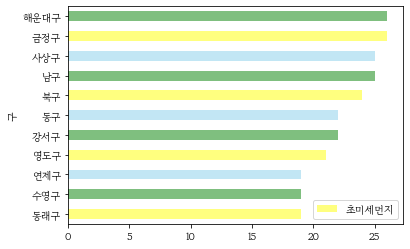

In [32]:
busan_gu = busan_gu.sort_values(by=['초미세먼지'], ascending=True)
busan_gu.plot.barh(x='구', y='초미세먼지', color=['yellow', 'green','skyblue'], alpha=0.5)

In [33]:
busan_time.pivot_table(index=['측정시간','구','동','업종'])

,,,,초미세먼지
측정시간,구,동,업종,
2022072701,사상구,삼락동,구조용금속제품제조업,14
2022072702,사상구,삼락동,구조용금속제품제조업,11
2022072703,북구,덕천동,도장,11
2022072704,북구,덕천동,도장,14
2022072705,강서구,녹산동,수생동물가공처리(10),19
2022072706,강서구,녹산동,수생동물가공처리(10),16
2022072707,강서구,녹산동,수생동물가공처리(10),21
2022072708,강서구,녹산동,수생동물가공처리(10),18
2022072709,사상구,학장동,도금업,16


<AxesSubplot:xlabel='측정시간'>

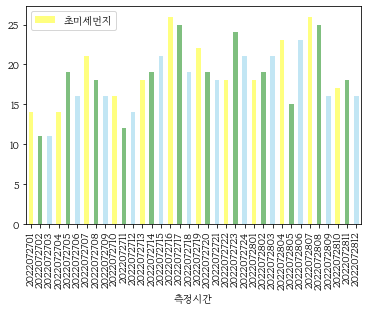

In [34]:
busan_time.plot.bar(x='측정시간', y='초미세먼지', color=['yellow', 'green','skyblue'], alpha=0.5)